# **Importing the Dataset and Handling the Data**

In [ ]:
import pandas as pd
df=pd.read_csv('diabetes.csv')

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


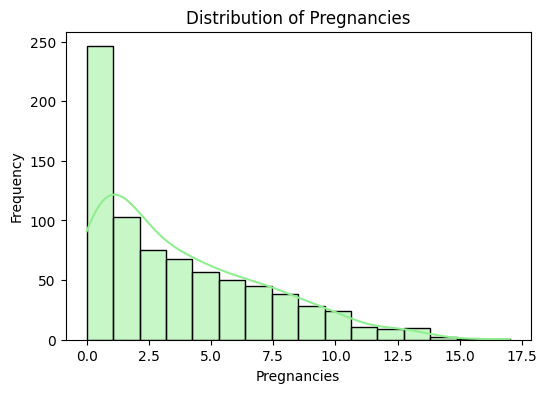

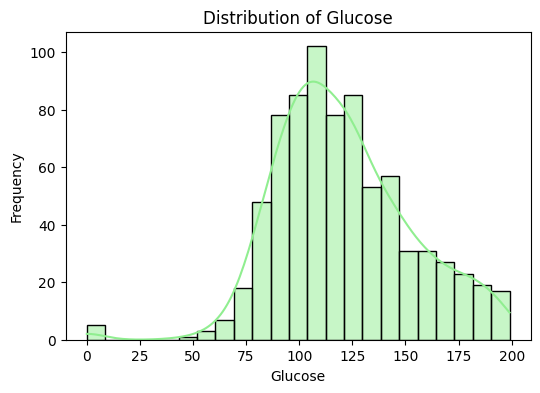

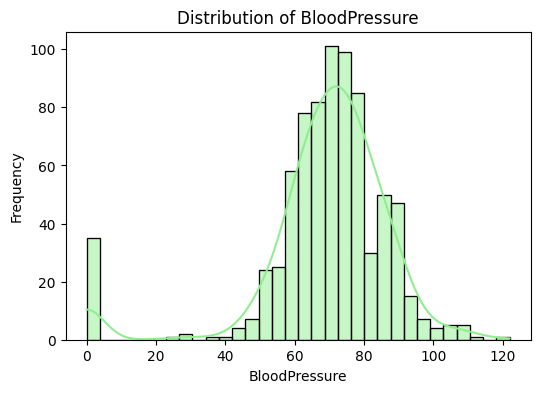

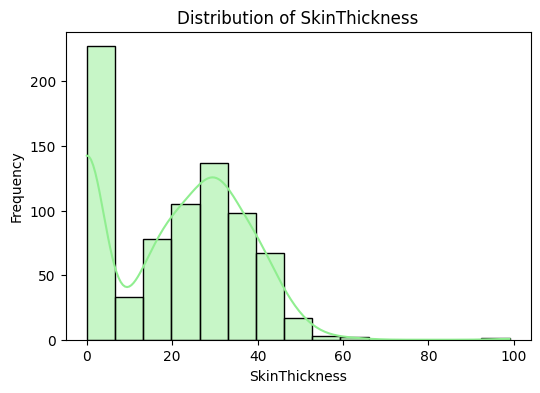

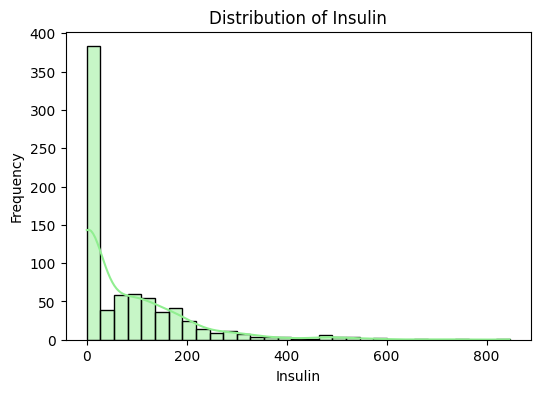

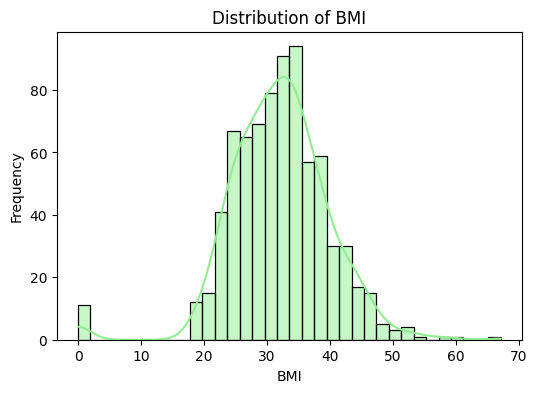

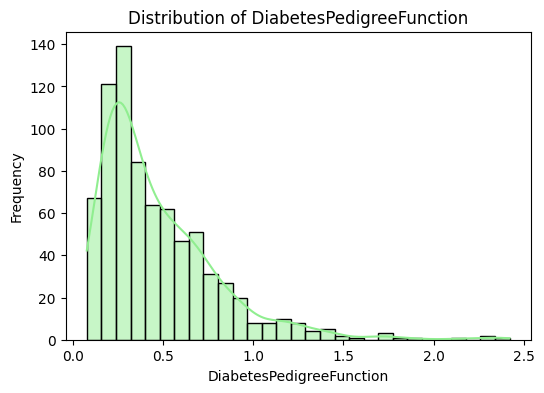

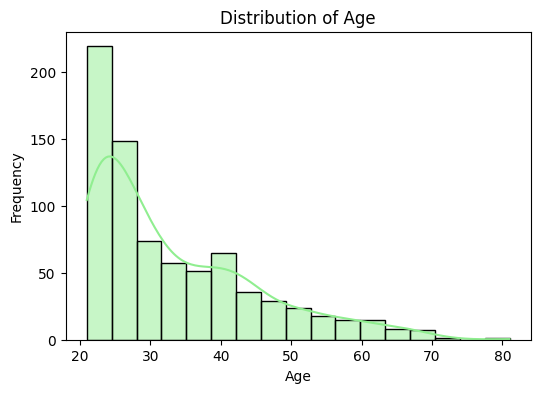

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col], kde=True,color='lightgreen')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
#no. of zeros in each column
(df==0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


Pregnancies can be 0, Outcome can be 0 or 1, but all other columns must not contain 0 values, these values must be imputed using mean or rounded mean

In [ ]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean().round(0))
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean().round(0))
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean().round(0))
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean().round(0))
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Outcome',axis=1)
y=df['Outcome']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

# **Single Variable Linear Regression**

In [ ]:
import numpy as np

In [ ]:
# @title Linear Regression from Scratch Using Gradient Descent
def linearRegression(x,y,lr,epochs):
    m=np.zeros(x.shape[1])
    b=0
    n=len(y)
    costhist=[]
    for _ in range(epochs):
        ypred=x.dot(m)+b
        cost=np.mean((ypred-y)**2)
        costhist.append(cost)
        dm=(2/n)*x.T.dot(ypred-y)
        db=(2/n)*np.sum(ypred-y)
        m-=lr*dm
        b-=lr*db
    plt.plot(costhist,color='orange')
    plt.title('Cost Function VS Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()
    return m,b

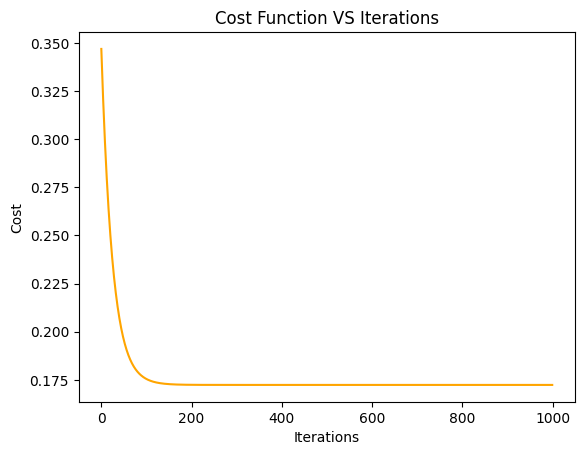

In [ ]:
# @title Cost Functions and Regression Line
xtrglc=xtrain[:,1].reshape(-1,1)
xteglc=xtest[:,1].reshape(-1,1)
m,b=linearRegression(xtrglc,ytrain,0.01,1000)

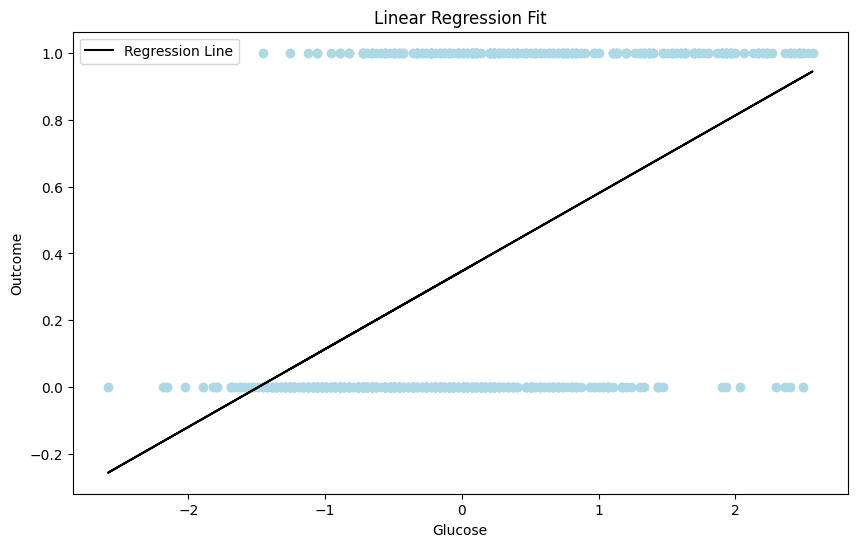

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(xtrglc,ytrain,color='lightblue')
plt.plot(xtrglc,xtrglc.dot(m)+b,color='black')
plt.title('Regression Line')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.legend()
plt.show()

In [ ]:
# @title Evaluation Metrics
from sklearn.metrics import mean_squared_error,r2_score
print("Training Results:")
print(f'MSE: {mean_squared_error(ytrain,xtrglc.dot(m)+b):.3f}')
print(f'R2: {r2_score(ytrain,xtrglc.dot(m)+b):.3f}')
print("\nTesting Results:")
print(f'MSE: {mean_squared_error(ytest,xteglc.dot(m)+b):.3f}')
print(f'R2: {r2_score(ytest,xteglc.dot(m)+b):.3f}')

Training Results:
MSE: 0.172
R2: 0.239

Testing Results:
MSE: 0.171
R2: 0.257


# **MultiVariable Linear Regression**

In [ ]:
# @title Vectorized LR Uing Gradient Descent with Regularizarion
def multivariableLR(x,y,lr,epochs,reg,typereg):
    m=np.zeros(x.shape[1])
    b=0
    n=len(y)
    costhist=[]
    ypredlist=[]
    for _ in range(epochs):
        ypred=x.dot(m)+b
        if typereg=='ridge':
            title='Cost function VS Iterations(Ridge)'
            cost=np.mean((ypred - y)**2)+reg*np.sum(m**2)
            dm=(2/n)*x.T.dot(ypred-y)+2*reg*m
        elif typereg=='lasso':
            title='Cost function VS Iterations(Lasso)'
            cost=np.mean((ypred-y)**2)+reg*np.sum(np.abs(m))
            dm=(2/n)*x.T.dot(ypred-y)+reg*np.sign(m)
        db = (2/n)*np.sum(ypred-y)
        m-=lr*dm
        b-=lr*db
        costhist.append(cost)
    ypredlist=x.dot(m)+b
    plt.plot(costhist)
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()
    return m,b,ypredlist

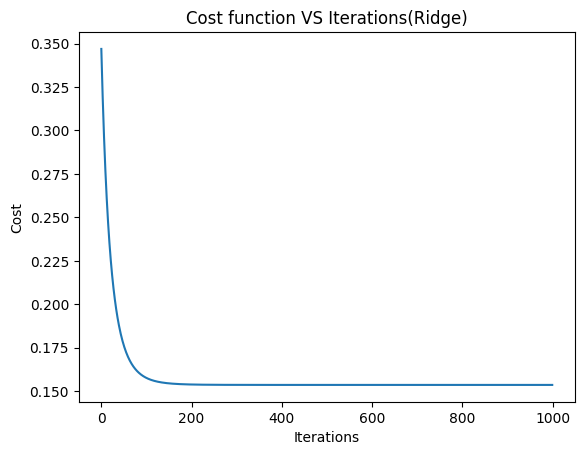

In [ ]:
# @title Ridge Cost Function
mr,br,_=multivariableLR(xtrain,ytrain,0.01,1000,0.01,'ridge')

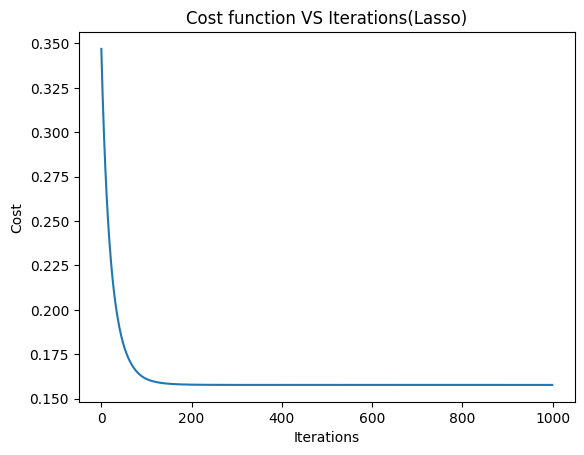

In [ ]:
# @title Lasso Cost Function
ml,bl,_=multivariableLR(xtrain,ytrain,0.01,1000,0.01,'lasso')

In [ ]:
# @title Evaluation Metrics
def adjustedr2(r2,n,k):
    return 1-(1-r2)*(n-1)/(n-k-1)

print("Ridge Regression Results:")
print("Training Results:")
r2tr=r2_score(ytrain,xtrain.dot(mr)+br)
print(f'MSE: {mean_squared_error(ytrain,xtrain.dot(mr)+br):.3f}')
print(f'R2: {r2tr:.3f}')
print(f'Adjusted R2:{adjustedr2(r2tr,len(ytrain),xtrain.shape[1]):.3f}')
print("\nTesting Results:")
r2te= r2_score(ytest,xtest.dot(mr)+br)
print(f'MSE: {mean_squared_error(ytest,xtest.dot(mr)+br):.3f}')
print(f'R2: {r2te:.3f}')
print(f'Adjusted R2: {adjustedr2(r2te, len(ytest), xtest.shape[1]):.3f}')
print('---------------------------------------------')
print("\nLasso Regression Results:")
print("Training Results:")
r2tr= r2_score(ytrain,xtrain.dot(ml)+bl)
print(f'MSE: {mean_squared_error(ytrain,xtrain.dot(ml)+bl):.3f}')
print(f'R2: {r2tr:.3f}')
print(f'Adjusted R2: {adjustedr2(r2tr,len(ytrain),xtrain.shape[1]):.3f}')
print("\nTesting Results:")
r2te=r2_score(ytest,xtest.dot(ml)+bl)
print(f'MSE: {mean_squared_error(ytest,xtest.dot(ml)+bl):.3f}')
print(f'R2: {r2te:.3f}')
print(f'Adjusted R2: {adjustedr2(r2te,len(ytest),xtest.shape[1]):.3f}')


Ridge Regression Results:
Training Results:
MSE: 0.153
R2: 0.325
Adjusted R2:0.316

Testing Results:
MSE: 0.165
R2: 0.282
Adjusted R2: 0.243
---------------------------------------------

Lasso Regression Results:
Training Results:
MSE: 0.153
R2: 0.323
Adjusted R2: 0.315

Testing Results:
MSE: 0.164
R2: 0.285
Adjusted R2: 0.246


# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# @title Polynomial Regression Using Degree 2 and 3
def polyRegression(x,y,degree,lr,epochs,reg,typereg):
    poly=PolynomialFeatures(degree)
    xpoly=poly.fit_transform(x)
    m,b,pl=multivariableLR(xpoly,y,lr,epochs,reg,typereg)
    return m,b,pl

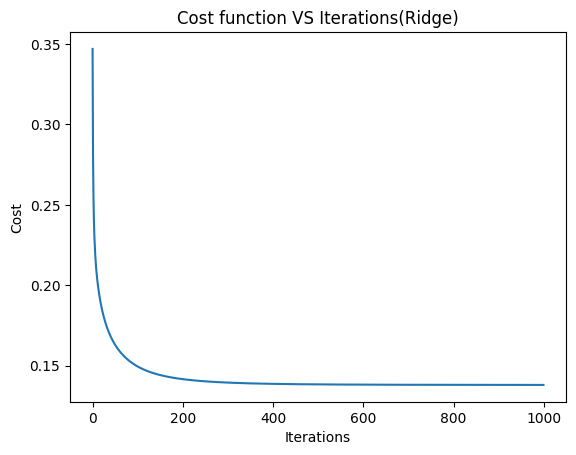

In [ ]:
mp2,bp2,pl2=polyRegression(xtrain,ytrain,2,0.01,1000,0.01,'ridge')

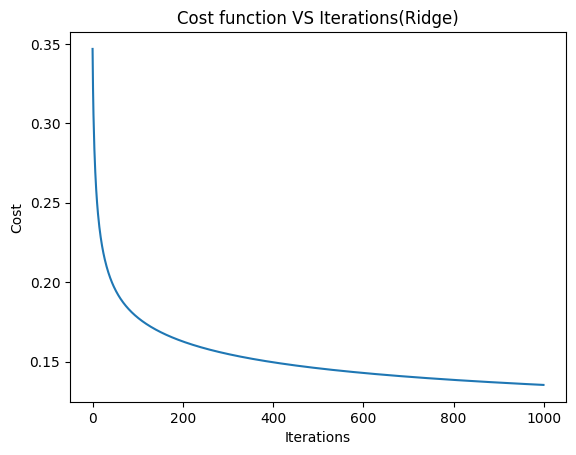

In [ ]:
mp3,bp3,pl3=polyRegression(xtrain,ytrain,3,0.001,1000,0.01,'ridge')

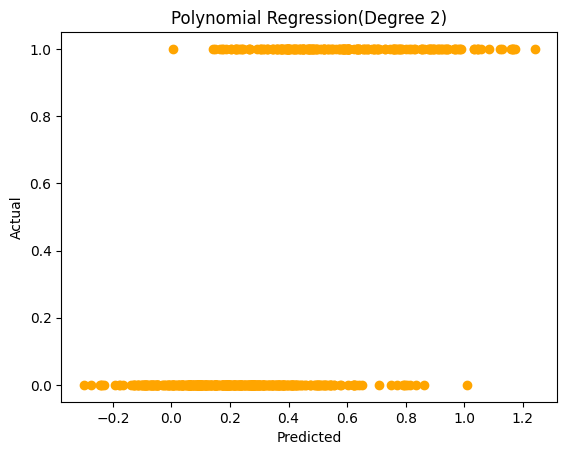

In [ ]:
# @title Polynomial Graphs
plt.scatter(pl2,ytrain,color='orange')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Polynomial Regression(Degree 2)')
plt.show()

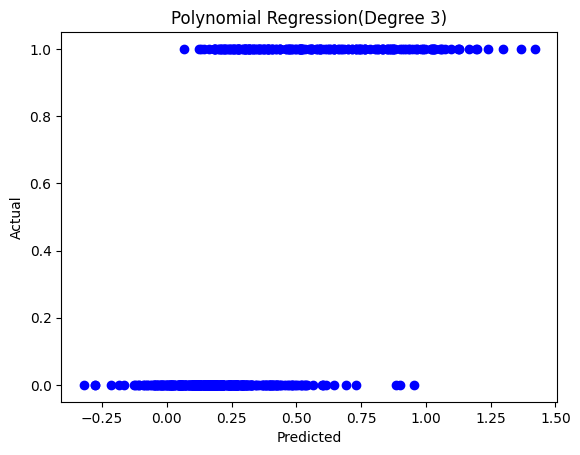

In [ ]:
plt.scatter(pl3,ytrain,color='blue')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Polynomial Regression(Degree 3)')
plt.show()

Since there are 8 features a curve cannot be constructed in a 2D or even a 3D plane, so instead scatter plotter of predictions has been made.

In [ ]:
xpolytest2=PolynomialFeatures(2).fit_transform(xtest)
xpolytest3=PolynomialFeatures(3).fit_transform(xtest)

In [ ]:
print("Polynomial Degree 2 Results (Training):")
print(f'MSE: {mean_squared_error(ytrain,pl2):.3f}')
print(f'R2: {r2_score(ytrain,pl2):.3f}')
print("\nRidge Regression Degree 2 Results (Testing):")
print(f'MSE: {mean_squared_error(ytest,xpolytest2.dot(mp2)+bp2):.3f}')
print(f'R2: {r2_score(ytest,xpolytest2.dot(mp2)+bp2):.3f}')
print('---------------------------------------------')
print("\nRidge Regression Degree 3 Results (Training):")
print(f'MSE: {mean_squared_error(ytrain,pl3):.3f}')
print(f'R2: {r2_score(ytrain,pl3):.3f}')
print("\nRidge Regression Degree 3 Results (Testing):")
print(f'MSE: {mean_squared_error(ytest,xpolytest3.dot(mp3)+bp3):.3f}')
print(f'R2: {r2_score(ytest,xpolytest3.dot(mp3)+bp3):.3f}')

Polynomial Degree 2 Results (Training):
MSE: 0.137
R2: 0.396

Ridge Regression Degree 2 Results (Testing):
MSE: 0.183
R2: 0.204
---------------------------------------------

Ridge Regression Degree 3 Results (Training):
MSE: 0.135
R2: 0.405

Ridge Regression Degree 3 Results (Testing):
MSE: 0.331
R2: -0.441


# **Logistic Regression**

In [ ]:
# @title Logistic Regression Using Gradient Descent
def logisticRegression(x,y,lr,epochs):
    m=np.zeros(x.shape[1])
    b=0
    n=len(y)
    costs = []
    for _ in range(epochs):
        ypred=1/(1+np.exp(-(x.dot(m)+b)))
        dm=(-1/n)*x.T.dot(y-ypred)
        db=(-1/n)*np.sum(y-ypred)
        m-=lr*dm
        b-=lr*db
        cost=(-1/n)*np.sum(y*np.log(ypred)+(1-y)*np.log(1-ypred))
        costs.append(cost)
    plt.plot(costs)
    plt.title('Cost Function VS Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()
    return m, b
def predict(x,m,b,threshold=0.5):
    ypred=1/(1+np.exp(-(x.dot(m)+b)))
    labels=(ypred>=threshold).astype(int)
    return ypred,labels

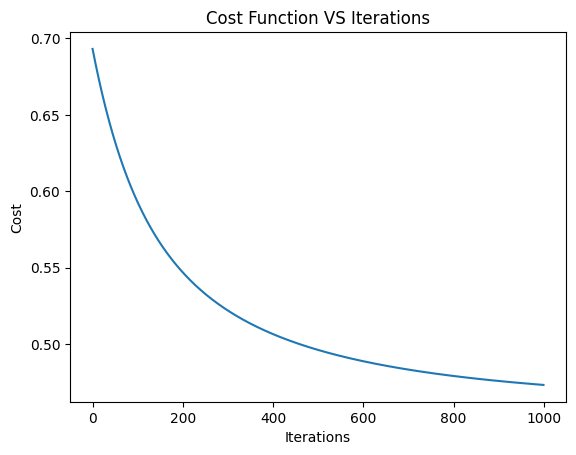

In [ ]:
mlog,blog=logisticRegression(xtrain,ytrain,0.01,1000)
_,ypred=predict(xtrain,mlog,blog)

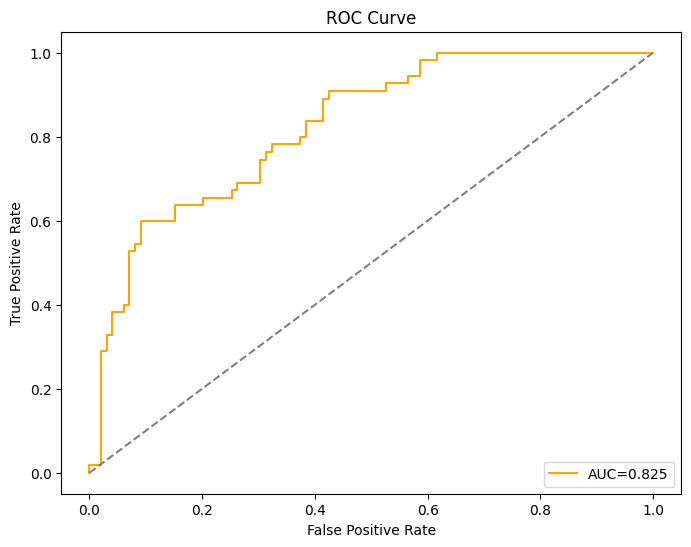

In [ ]:
# @title ROC AUC
from sklearn.metrics import roc_curve,roc_auc_score
yprob,_=predict(xtest,mlog,blog)
fpr,tpr,thresholds=roc_curve(ytest,yprob)
auc=roc_auc_score(ytest,yprob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='orange',label=f'AUC={auc:.3f}')
plt.plot([0, 1],[0, 1],color='gray',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# @title Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
_,yptrl=predict(xtrain,mlog,blog)
actr=accuracy_score(ytrain,yptrl)
pretr=precision_score(ytrain,yptrl)
rectr=recall_score(ytrain,yptrl)
f1tr=f1_score(ytrain,yptrl)
_,yptl=predict(xtest,mlog,blog)
acte=accuracy_score(ytest,yptl)
prete=precision_score(ytest,yptl)
recte=recall_score(ytest,yptl)
f1te=f1_score(ytest,yptl)
print("-------------------------")
print("Logistic Regression:")
print("-------------------------")
print("Training Results:")
print(f"Accuracy: {actr:.3f}")
print(f"Precision: {pretr:.3f}")
print(f"Recall: {rectr:.3f}")
print(f"F1: {f1tr:.3f}")
print("-------------------------")
print("Testing Results:")
print(f"Accuracy: {acte:.3f}")
print(f"Precision: {prete:.3f}")
print(f"Recall: {recte:.3f}")
print(f"F1: {f1te:.3f}")


-------------------------
Logistic Regression:
-------------------------
Training Results:
Accuracy: 0.774
Precision: 0.708
Recall: 0.592
F1: 0.645
-------------------------
Testing Results:
Accuracy: 0.740
Precision: 0.632
Recall: 0.655
F1: 0.643


# **Linear Kernel SVM - Hard Margin**

# Since we have to visualize the decision boundary, and it is only possible to visualize 2 features at most, so I will be taking 2 features only for the SVM

In [ ]:
x.corrwith(y)

,0
Pregnancies,0.221898
Glucose,0.492911
BloodPressure,0.162879
SkinThickness,0.177741
Insulin,0.179308
BMI,0.312254
DiabetesPedigreeFunction,0.173844
Age,0.238356


In [ ]:
#choosing top 2 features from correlation with y
xtrains=xtrain[:,[1,5]]
xtests=xtest[:,[1,5]]

In [ ]:
# @title Implementation
from sklearn.svm import SVC

In [ ]:
svm=SVC(kernel='linear',C=100000)
svm.fit(xtrains,ytrain)

SVC(C=100000, kernel='linear')

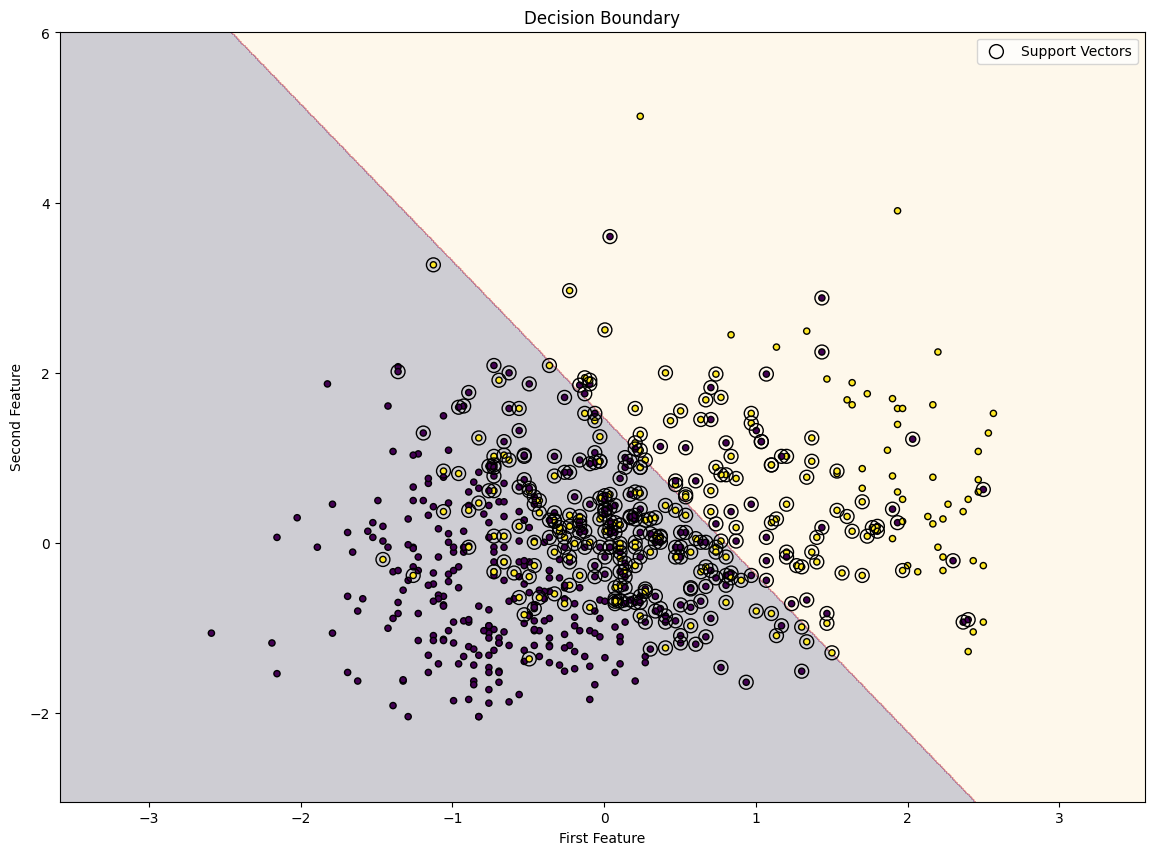

In [ ]:
# @title Decision Boundary
def decisionBoundary(x,y,model):
    plt.figure(figsize=(14, 10))
    xmin,xmax=x[:,0].min()-1,x[:,0].max()+1
    ymin,ymax=x[:,1].min()-1,x[:,1].max()+1
    x1,y1=np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
    pred1=model.predict(np.c_[x1.ravel(),y1.ravel()]).reshape(x1.shape)
    plt.contourf(x1,y1,pred1,alpha=0.2,cmap='magma')
    plt.scatter(x[:, 0],x[:,1],c=y,cmap='viridis',s=20,edgecolor='k')
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=100,facecolors='none',edgecolors='k',label='Support Vectors')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()
decisionBoundary(xtrains,ytrain,svm)

In [ ]:
# @title Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
pred2=svm.predict(xtests)
accuracy=accuracy_score(ytest,pred2)
precision=precision_score(ytest,pred2)
recall=recall_score(ytest,pred2)
f1=f1_score(ytest,pred2)
print(f'Testing Accuracy: {accuracy:.3f}')
print(f'Testing Precision: {precision:.3f}')
print(f'Testing Recall: {recall:.3f}')
print(f'Testing F1: {f1:.3f}')

Testing Accuracy: 0.760
Testing Precision: 0.688
Testing Recall: 0.600
Testing F1: 0.641


Text(50.722222222222214, 0.5, 'Actual')

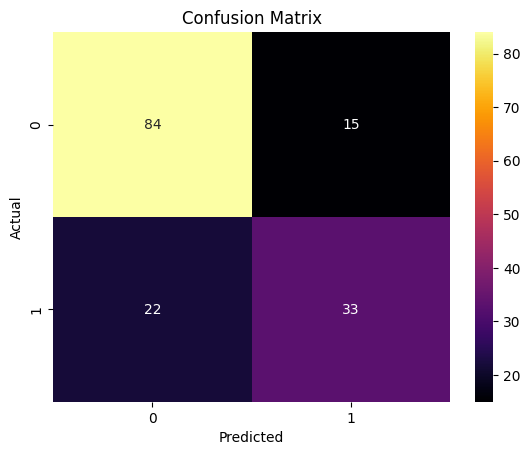

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(ytest,pred2),annot=True,cmap='inferno')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# **Polynomial Kernel SVM - Soft Margin**

In [ ]:
# @title With Different Degree of Polynomials
from sklearn.model_selection import GridSearchCV
model=SVC(kernel='poly')
pgrid={'degree': [2, 3, 4, 5],'C':[0.1,0.5,1]}
grid=GridSearchCV(model,pgrid,cv=5,scoring='accuracy')
grid.fit(xtrains,ytrain)
deg=grid.best_params_['degree']
cval=grid.best_params_['C']
print(f"Best Degree: {deg}")
print(f"Best C: {cval}")

Best Degree: 3
Best C: 1


In [ ]:
svm=SVC(kernel='poly',degree=deg,C=cval)
svm.fit(xtrains,ytrain)

SVC(C=1, kernel='poly')

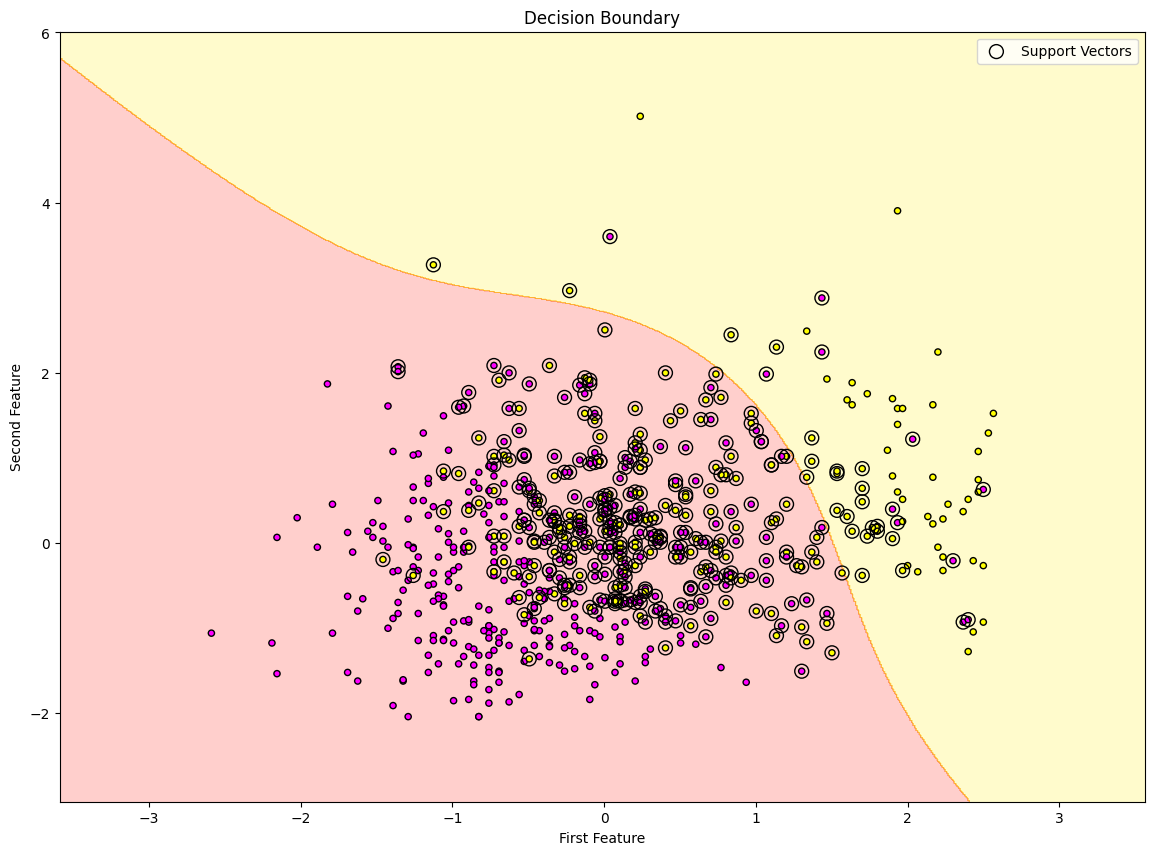

In [ ]:
# @title Decision Boundary
def decisionBoundary(x,y,model):
    plt.figure(figsize=(14, 10))
    xmin,xmax=x[:,0].min()-1,x[:,0].max()+1
    ymin,ymax=x[:,1].min()-1,x[:,1].max()+1
    x1,y1=np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
    pred1=model.predict(np.c_[x1.ravel(),y1.ravel()]).reshape(x1.shape)
    plt.contourf(x1,y1,pred1,alpha=0.2,cmap='autumn')
    plt.scatter(x[:, 0],x[:,1],c=y,cmap='spring',s=20,edgecolor='k')
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=100,facecolors='none',edgecolors='k',label='Support Vectors')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()
decisionBoundary(xtrains,ytrain,svm)

In [ ]:
# @title Accuracy, Precision, Recall, F1 score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
pred2=svm.predict(xtests)
accuracy=accuracy_score(ytest,pred2)
precision=precision_score(ytest,pred2)
recall=recall_score(ytest,pred2)
f1=f1_score(ytest,pred2)
print(f'Testing Accuracy: {accuracy:.3f}')
print(f'Testing Precision: {precision:.3f}')
print(f'Testing Recall: {recall:.3f}')
print(f'Testing F1: {f1:.3f}')

Testing Accuracy: 0.734
Testing Precision: 0.850
Testing Recall: 0.309
Testing F1: 0.453


# **RBF Kernel SVM - Soft Margin**

In [ ]:
from sklearn.model_selection import GridSearchCV
model=SVC(kernel='rbf')
pgrid={'gamma': [0.1,1,5,10],'C':[0.01,0.1,0.5,1,5,10]}
grid=GridSearchCV(model,pgrid,cv=5,scoring='accuracy')
grid.fit(xtrains,ytrain)
gam=grid.best_params_['gamma']
cval=grid.best_params_['C']
print(f"Best Gamma: {gam}")
print(f"Best C: {cval}")

Best Gamma: 0.1
Best C: 0.1


In [ ]:
svm=SVC(kernel='rbf',gamma=gam,C=cval)
svm.fit(xtrains,ytrain)

SVC(C=0.1, gamma=0.1)

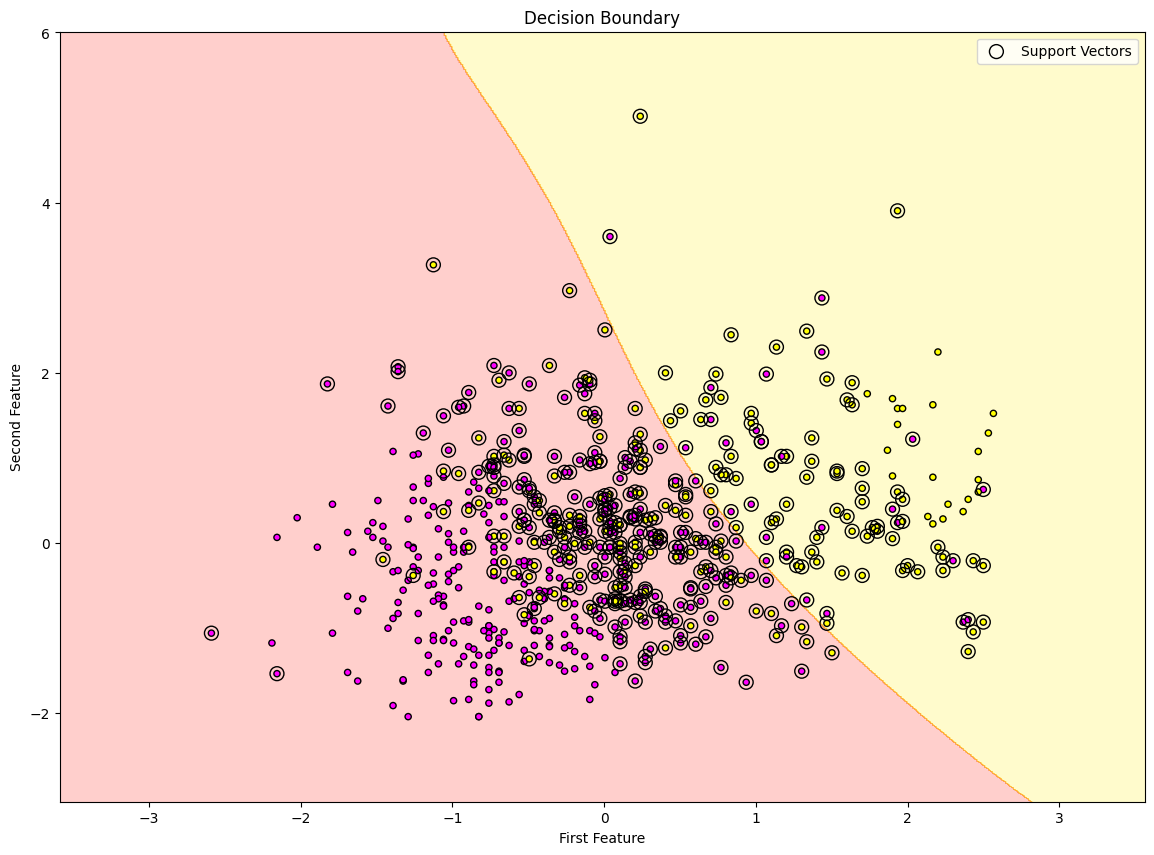

In [ ]:
def decisionBoundary(x,y,model):
    plt.figure(figsize=(14, 10))
    xmin,xmax=x[:,0].min()-1,x[:,0].max()+1
    ymin,ymax=x[:,1].min()-1,x[:,1].max()+1
    x1,y1=np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
    pred1=model.predict(np.c_[x1.ravel(),y1.ravel()]).reshape(x1.shape)
    plt.contourf(x1,y1,pred1,alpha=0.2,cmap='autumn')
    plt.scatter(x[:, 0],x[:,1],c=y,cmap='spring',s=20,edgecolor='k')
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=100,facecolors='none',edgecolors='k',label='Support Vectors')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()
decisionBoundary(xtrains,ytrain,svm)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
pred2=svm.predict(xtests)
accuracy=accuracy_score(ytest,pred2)
precision=precision_score(ytest,pred2)
recall=recall_score(ytest,pred2)
f1=f1_score(ytest,pred2)
print(f'Testing Accuracy: {accuracy:.3f}')
print(f'Testing Precision: {precision:.3f}')
print(f'Testing Recall: {recall:.3f}')
print(f'Testing F1: {f1:.3f}')

Testing Accuracy: 0.766
Testing Precision: 0.721
Testing Recall: 0.564
Testing F1: 0.633


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

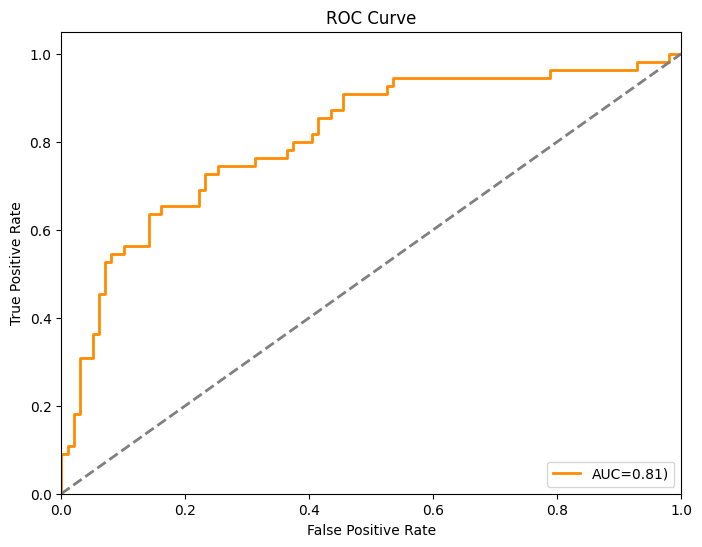

In [ ]:
svm=SVC(kernel='rbf',gamma=gam,C=cval,probability=True)
svm.fit(xtrains,ytrain)
prb=svm.predict_proba(xtests)[:,1]
fpr,tpr,_=roc_curve(ytest,prb)
auc=roc_auc_score(ytest,prb)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'AUC={auc:.2f})')
plt.plot([0, 1],[0, 1],color='gray',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **Performance Analysis**

# Regression Tasks

Polynomial Regression with a degree of 3 gave the best R-squared value on the training data of 0.405, meaning it explained more of the variance. However, it performed poorly on the testing data having R2 score = -0.441, indicating overfitting. Ridge Regression with degree 3 had a lower MSE 0.135 on the training data, but its performance on the test data was worse compared to degree 2, where the MSE was 0.165. In general, Ridge and Lasso regression models with multiple variables performed better on the test data than the polynomial models, showing they generalized better. In terms of training results polynomial regression gave best results, but in terms of overall testing, training results and a generalized model, multivariable regression with both lasso and ridge proved to be great, providing similar results.

# Classification Tasks

For classification tasks, the RBF SVM performed the best overall, with the highest accuracy of 0.766 and precision of 0.721. However, its recall was lower at 0.564, meaning it missed some positive cases, which led to an F1 score of 0.633. Logistic Regression also performed well, achieving a good balance with a precision of 0.632 and recall of 0.655, resulting in an F1 score of 0.643. The Linear SVM had similar performance with an accuracy of 0.760, but its recall was slightly lower at 0.600. The Polynomial SVM, while having very high precision of 0.850, struggled with recall at 0.309, leading to the lowest F1 score of 0.453. Overall, the RBF SVM handled the task the best, offering a good balance between precision and recall and also providinig with good testing accuracy. SVM models were trained on only 2 features yet still managed to achieve better results than logistic regression, especially SVM with RBF Kernel, thus showing how effective they are.

# Effect of Regularization

L1 regularization, also known as Lasso, and L2 regularization, known as Ridge, helped improve linear regression by reducing overfitting and allowing the model to generalize better to new data. These techniques made the model focus on the most important features, leading to slightly better test results compared to regular linear regression. For example, Lasso and Ridge had a lower mean squared error of 0.165, while regular linear regression had an error of 0.171, showing that regularization helped reduce errors. In logistic regression, regularization also controlled the model complexity, preventing it from fitting too closely to the training data, which improved its performance on new data. The difference between Lasso and Ridge was small, meaning both worked similarly in improving performance. In conclusion, regularization proved played an important part in reducing overfitting while still decreasing the cost function and lead to better results.

# SVM Kernel Comparison

The RBF Kernel performed better than the Polynomial Kernel for classification tasks. The RBF SVM achieved higher accuracy, scoring 0.766, along with precision of 0.721, showing it was effective in correctly identifying positive cases. On the other hand, the Polynomial SVM, while having a higher precision of 0.850, struggled with recall, only reaching a value of 0.309. This means it missed a large number of positive instances, which is a major drawback for classification models, especially when the goal is to identify as many true positives as possible. Despite the Polynomial SVM's higher precision, it wasnot as reliable overall because it failed to detect many of the relevant positive cases, leading to a lower F1 score. The RBF SVM, in contrast, achieved a better balance between accuracy and recall, meaning it did a better job of both identifying positive cases and avoiding false positives. The RBF Kernel is more flexible in capturing complex patterns in the data, especially when the decision boundaries between classes are not simple, which is why it performed better at generalizing to new, unseen data. In summary, the RBF kernel outperformed the Polynomial kernel because it could adapt better to the complexity of the data thus providing better overall results.